Group members: Amber Wu, Maraline Torres, Shamika Kalwe, Xuanqi Liang

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error, confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hiringData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   group       2000 non-null   object 
 2   A           2000 non-null   float64
 3   B           2000 non-null   float64
 4   C           2000 non-null   float64
 5   D           2000 non-null   float64
 6   E           2000 non-null   float64
 7   hired       2000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 125.1+ KB


In [4]:
df.head()

,Unnamed: 0,group,A,B,C,D,E,hired
0,126,male,0.056369,0.0,1.000000,0.347826,0.406201,1
1,1353,female,0.056369,0.0,1.000000,0.347826,0.406201,0
2,83,male,1.000000,1.0,0.000000,0.260870,0.000000,0
3,219,male,0.000000,0.0,0.813711,0.086957,1.000000,1
4,1567,female,0.195270,0.5,0.934376,0.086957,0.477683,0


In [5]:
df.nunique()

Unnamed: 0    2000
group            2
A               10
B                3
C               10
D                9
E               10
hired            2
dtype: int64

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,group,A,B,C,D,E,hired
0,male,0.056369,0.0,1.000000,0.347826,0.406201,1
1,female,0.056369,0.0,1.000000,0.347826,0.406201,0
2,male,1.000000,1.0,0.000000,0.260870,0.000000,0
3,male,0.000000,0.0,0.813711,0.086957,1.000000,1
4,female,0.195270,0.5,0.934376,0.086957,0.477683,0


In [7]:
df['group'] = df['group'].apply(lambda x : 1 if x == 'female' else 0)

In [8]:
df.head()

,group,A,B,C,D,E,hired
0,0,0.056369,0.0,1.000000,0.347826,0.406201,1
1,1,0.056369,0.0,1.000000,0.347826,0.406201,0
2,0,1.000000,1.0,0.000000,0.260870,0.000000,0
3,0,0.000000,0.0,0.813711,0.086957,1.000000,1
4,1,0.195270,0.5,0.934376,0.086957,0.477683,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('hired', axis=1), df['hired'], test_size=0.2, random_state=0)

In [10]:
X_train.head()

,group,A,B,C,D,E
582,1,0.355261,0.0,0.770183,0.565217,0.074623
159,0,0.355261,0.0,0.770183,0.565217,0.074623
1827,1,0.000000,0.0,0.813711,0.086957,1.000000
318,1,0.104900,0.5,0.484753,0.130435,0.775994
708,1,0.056369,0.0,1.000000,0.347826,0.406201


### Linear Regression using A, B, C, D, E as predictors

In [11]:
model = LinearRegression()
model.fit(X_train.drop('group', axis=1), y_train)
y_pred = model.predict(X_test.drop('group', axis=1))

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred)}')

Coefficeints: [ 0.7994783  -0.46244255  0.15988539  0.34557552  0.52045821]
r2_score: 0.26866278886281625
mean_squared_error: 0.17723500226152689


In [12]:
X = X_train.drop('group', axis=1)
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  hired   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 20 May 2021   Prob (F-statistic):          6.44e-106
Time:                        07:43:37   Log-Likelihood:                -871.57
No. Observations:                1600   AIC:                             1755.
Df Residuals:                    1594   BIC:                             1787.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2372      0.036     -6.522      0.0

### Linear Regression using A, B, C, D, E and group as predictors

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred)}')

Coefficeints: [ 0.02250163  0.80565059 -0.47664166  0.15712464  0.34304165  0.52051166]
r2_score: 0.2703253865861287
mean_squared_error: 0.17683208209451787


In [14]:
X = X_train
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  hired   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     98.04
Date:                Thu, 20 May 2021   Prob (F-statistic):          4.55e-105
Time:                        07:43:37   Log-Likelihood:                -871.08
No. Observations:                1600   AIC:                             1756.
Df Residuals:                    1593   BIC:                             1794.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2437      0.037     -6.592      0.0

### We see that the p-value for the group variable is high and thus it is not statistically significant.
### Thus we conclude that our models is not biased

### Logistic Regression using A, B, C, D, E as predictors

In [15]:
model = LogisticRegression()
model.fit(X_train.drop('group', axis=1), y_train)
y_pred = model.predict(X_test.drop('group', axis=1))

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred)}')
print(f'Confusion Matrix (tn, fp): {confusion_matrix(y_test, y_pred, normalize="all")[0]}')
print(f'Confusion Matrix (fn, tp): {confusion_matrix(y_test, y_pred, normalize="all")[1]}')

Coefficeints: [[ 4.06235507 -2.49659152  0.84991274  1.55722626  2.38792551]]
r2_score: -0.19664732430689869
mean_squared_error: 0.29
Confusion Matrix (tn, fp): [0.5725 0.015 ]
Confusion Matrix (fn, tp): [0.275  0.1375]


### Logistic Regression using A, B, C, D, E and group as predictors

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_g = model.predict(X_test)

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y_test, y_pred_g)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred_g)}')
print(f'Confusion Matrix (tn, fp): {confusion_matrix(y_test, y_pred_g, normalize="all")[0]}')
print(f'Confusion Matrix (fn, tp): {confusion_matrix(y_test, y_pred_g, normalize="all")[1]}')

Coefficeints: [[ 0.09451805  4.08306824 -2.55325222  0.82748114  1.55252562  2.39519354]]
r2_score: -0.19664732430689869
mean_squared_error: 0.29
Confusion Matrix (tn, fp): [0.5725 0.015 ]
Confusion Matrix (fn, tp): [0.275  0.1375]


In [17]:
y_pred_g

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

New data

In [18]:
df_lw = pd.read_csv('hiringDataWLatentVariable.csv')

In [19]:
df_lw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   group       2000 non-null   object 
 2   A           2000 non-null   float64
 3   B           2000 non-null   float64
 4   C           2000 non-null   float64
 5   D           2000 non-null   float64
 6   E           2000 non-null   float64
 7   hired       2000 non-null   int64  
 8   quality     2000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 140.8+ KB


In [20]:
df_lw.drop('Unnamed: 0', axis=1, inplace=True)
df_lw['group'] = df_lw['group'].apply(lambda x : 1 if x == 'female' else 0)
df_lw.head()

,group,A,B,C,D,E,hired,quality
0,0,0.056369,0.0,1.000000,0.347826,0.406201,1,0.165853
1,1,0.056369,0.0,1.000000,0.347826,0.406201,0,0.165752
2,0,1.000000,1.0,0.000000,0.260870,0.000000,0,0.608314
3,0,0.000000,0.0,0.813711,0.086957,1.000000,1,0.455447
4,1,0.195270,0.5,0.934376,0.086957,0.477683,0,0.312300


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_lw.drop('hired', axis=1), df['hired'], test_size=0.2, random_state=0)

In [22]:
X_train.head()

,group,A,B,C,D,E,quality
582,1,0.355261,0.0,0.770183,0.565217,0.074623,0.124097
159,0,0.355261,0.0,0.770183,0.565217,0.074623,0.121927
1827,1,0.000000,0.0,0.813711,0.086957,1.000000,0.457618
318,1,0.104900,0.5,0.484753,0.130435,0.775994,0.179874
708,1,0.056369,0.0,1.000000,0.347826,0.406201,0.165902


In [23]:
# Linear without group, quality and with A to E predictors to get our risk score
X = df_lw.drop('hired',axis=1)
y = df_lw['hired']
model = LinearRegression()
model.fit(X.drop(['quality','group'],axis=1), y)
y_pred = model.predict(X.drop(['quality','group'], axis=1))

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y, y_pred)}')

Coefficeints: [ 0.77139506 -0.45318828  0.1510726   0.38169653  0.53856704]
r2_score: 0.2700728331979495
mean_squared_error: 0.17451080455724258


In [24]:
df_final = pd.DataFrame({'actual': y.values.reshape(-1,), 'risk_score': y_pred,
                      'female':X['group'], 'quality':X['quality']
                      })
df_final.head()

,actual,risk_score,female,quality
0,1,0.306890,0,0.165853
1,0,0.306890,1,0.165752
2,0,0.178584,0,0.608314
3,1,0.455492,0,0.455447
4,0,0.116454,1,0.312300


In [25]:
# Linear with quality
X = df_final[['quality']]
y = df_final['risk_score']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y, y_pred)}')

Coefficeints: [0.44949318]
r2_score: 0.3071289268902123
mean_squared_error: 0.044737954518490664


In [26]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             risk_score   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     885.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.09e-161
Time:                        07:43:37   Log-Likelihood:                 269.06
No. Observations:                2000   AIC:                            -534.1
Df Residuals:                    1998   BIC:                            -522.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2067      0.008     26.108      0.0

In [27]:
# Linear with quality and gender
X = df_final[['quality', 'female']]
y = df_final['risk_score']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f'Coefficeints: {model.coef_}')
print(f'r2_score: {r2_score(y, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y, y_pred)}')

Coefficeints: [ 0.47103994 -0.09798038]
r2_score: 0.34359337144545343
mean_squared_error: 0.042383483787402844


In [28]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             risk_score   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     522.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.80e-183
Time:                        07:43:37   Log-Likelihood:                 323.12
No. Observations:                2000   AIC:                            -640.2
Df Residuals:                    1997   BIC:                            -623.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.009     28.712      0.0

#### We see that there is negative coefficient of female gender and it is significant
#### Even without using gender (group) we see that the risk_score we predicted using variables A,B,C,D,E is biased against females
#### Now we try and explore the possible reason, i.e. see if and how gender affects A,B,C,D,E,

In [29]:
df_lw.groupby('group').mean()

,A,B,C,D,E,hired,quality
group,,,,,,,
0,0.385096,0.2055,0.620267,0.342565,0.436268,0.412,0.376947
1,0.477277,0.4850,0.630841,0.363826,0.414978,0.379,0.463285


In [30]:
df_lw.describe()

,group,A,B,C,D,E,hired,quality
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,0.500000,0.431186,0.345250,0.625554,0.353196,0.425623,0.39550,0.420116
std,0.500125,0.367851,0.423695,0.361473,0.313524,0.318849,0.48908,0.313370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-0.002508
25%,0.000000,0.187807,0.000000,0.438060,0.086957,0.170236,0.00000,0.166008
50%,0.500000,0.195270,0.000000,0.813711,0.260870,0.406459,0.00000,0.314163
75%,1.000000,0.872898,1.000000,0.923288,0.565217,0.669803,1.00000,0.610094
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.002386


In [31]:
df_lw.groupby('group').count()

,A,B,C,D,E,hired,quality
group,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000


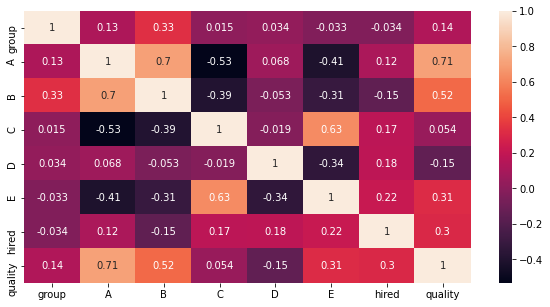

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df_lw.corr(), annot=True)
plt.show()

#### From the above we see that gender is slightly correlated to B (0.33) and even more slightly with A (0.13)

#### We will check the statistical significance of the same i.e. A, B, C, D, E versus Gender

In [33]:
X = df_lw[['group']]
y = df_lw['A']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     31.88
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.87e-08
Time:                        07:43:38   Log-Likelihood:                -821.39
No. Observations:                2000   AIC:                             1647.
Df Residuals:                    1998   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3851      0.012     33.360      0.0

#### Gender significantly affects A

In [34]:
X = df_lw[['group']]
y = df_lw['B']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     244.0
Date:                Thu, 20 May 2021   Prob (F-statistic):           5.42e-52
Time:                        07:43:38   Log-Likelihood:                -1004.7
No. Observations:                2000   AIC:                             2013.
Df Residuals:                    1998   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2055      0.013     16.243      0.0

#### Gender significantly affects B

In [35]:
X = df_lw[['group']]
y = df_lw['C']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4278
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.513
Time:                        07:43:38   Log-Likelihood:                -802.03
No. Observations:                2000   AIC:                             1608.
Df Residuals:                    1998   BIC:                             1619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6203      0.011     54.255      0.0

#### Gender does not significantly affect C

In [36]:
X = df_lw[['group']]
y = df_lw['D']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.301
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.129
Time:                        07:43:38   Log-Likelihood:                -516.47
No. Observations:                2000   AIC:                             1037.
Df Residuals:                    1998   BIC:                             1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3426      0.010     34.563      0.0

#### Gender does not significantly affect D

In [37]:
X = df_lw[['group']]
y = df_lw['E']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.231
Date:                Thu, 20 May 2021   Prob (F-statistic):              0.135
Time:                        07:43:38   Log-Likelihood:                -550.19
No. Observations:                2000   AIC:                             1104.
Df Residuals:                    1998   BIC:                             1116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4363      0.010     43.281      0.0

#### Gender does not significantly affect E

#### From the above we can conclude that gender affects A, B which caused our risk_score to be biased